In [8]:
from impedance import preprocessing
import pandas as pd
import os


data_path = os.path.join("wyniki", "eis_mo_po-flircie.txt")

data = pd.read_csv(data_path, sep="\t")


frequencies, Z = data.iloc[:,0,], data.iloc[:,1] - 1j*data.iloc[:,2]
# frequencies, Z = data.iloc[:,0], data.iloc[:,1] + 1j*data.iloc[:,2]

# keep only the impedance data in the first quandrant
# frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [9]:
frequencies

0     200000.00
1     137000.00
2      93200.00
3      63600.00
4      43400.00
5      29600.00
6      20200.00
7      13800.00
8       9430.00
9       6440.00
10      4390.00
11      3000.00
12      2050.00
13      1400.00
14       954.00
15       651.00
16       445.00
17       304.00
18       207.00
19       141.00
20        96.50
21        65.90
22        45.00
23        30.70
24        21.00
25         4.55
26         3.11
Name: freq/Hz, dtype: float64

In [10]:
Z

0     0.19200-0.01950j
1     0.19800-0.01930j
2     0.18700-0.01220j
3     0.17900+0.01480j
4     0.19500+0.03720j
5     0.16000+0.00971j
6     0.19600+0.00424j
7     0.21200-0.00664j
8     0.15000-0.01000j
9     0.18800-0.02010j
10    0.26400+0.00357j
11    0.19200-0.01730j
12    0.21900-0.02060j
13    0.23500-0.08270j
14    0.19900-0.05080j
15    0.21300-0.12600j
16    0.27200-0.12700j
17    0.30600-0.23800j
18    0.29100-0.35400j
19    0.38700-0.36000j
20    0.47600-0.49400j
21    0.61300-0.61900j
22    0.91600-0.76200j
23    1.10000-0.80800j
24    1.37000-0.70200j
25    1.72000-0.47300j
26    2.19000-0.19200j
dtype: complex128

In [11]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(CPE1,R1)'
initial_guess = [100, 1, 1, 100]

circuit_model = CustomCircuit(circuit, initial_guess=initial_guess)

In [12]:
circuit_model.plot()

ValueError: max() iterable argument is empty

In [13]:
circuit_model.fit(frequencies, Z)

In [14]:
circuit_model.parameters_

array([0.19144793, 0.00628962, 0.85332509, 1.92402936])

In [15]:
Z_fit = circuit_model.predict(frequencies)

In [16]:
Z_fit

array([0.19167506-0.00096613j, 0.19176184-0.00133415j,
       0.19188449-0.00185317j, 0.1920537 -0.00256718j,
       0.19228899-0.0035561j , 0.19261712-0.00492774j,
       0.19307418-0.0068241j , 0.19371113-0.00943983j,
       0.19460318-0.01305217j, 0.19586109-0.01804948j,
       0.19765322-0.0249862j , 0.20019628-0.03449105j,
       0.20386067-0.04756451j, 0.20921392-0.06552756j,
       0.21719136-0.09023926j, 0.22915944-0.12371143j,
       0.24735799-0.16851245j, 0.27557121-0.22788733j,
       0.3200688 -0.30523974j, 0.38946621-0.40100648j,
       0.49385529-0.51008547j, 0.64615412-0.62230413j,
       0.85015784-0.71477226j, 1.0941161 -0.76068952j,
       1.34498836-0.74373413j, 1.95858553-0.34720785j,
       2.01287287-0.2620008j ])

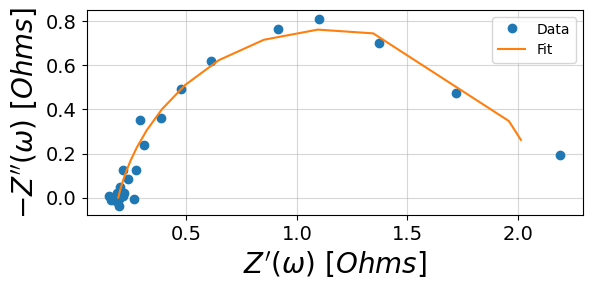

In [17]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=1, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=1, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()